# Nonlinear Classification
Under construction (3 Oct 2018)

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import NeuralNetwork as NN
import Layer
import importlib
import time
from copy import deepcopy
from IPython.display import display
from ipywidgets import FloatProgress

importlib.reload(NN)
importlib.reload(Layer);

In [79]:
# Three classes, arranged in 3 rings
# Training set
train_samples1 = 4
training_input = []
training_output = []
for n in range(train_samples1):
    rho = np.random.normal()*0.2
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    training_input.append(np.array([x,y]))
    training_output.append(np.array([1,0.,0]))

train_samples2 = train_samples1
for n in range(train_samples2):
    rho = np.random.normal()*0.1 + 0.6
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    training_input.append(np.array([x,y]))
    training_output.append(np.array([0.,1,0]))

train_samples3 = train_samples1
for n in range(train_samples3):
    rho = np.random.normal()*0.1 + 1.
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    training_input.append(np.array([x,y]))
    training_output.append(np.array([0.,0,1]))

train = [np.array(training_input), np.array(training_output)]

# Test set
n_samples1 = 3
test_input = []
test_output = []
for n in range(n_samples1):
    rho = np.random.normal()*0.2
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    test_input.append(np.array([x,y]))
    test_output.append(np.array([1,0.,0]))

n_samples2 = n_samples1
for n in range(n_samples2):
    rho = np.random.normal()*0.1 + 0.6
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    test_input.append(np.array([x,y]))
    test_output.append(np.array([0.,1,0]))

n_samples3 = n_samples1
for n in range(n_samples3):
    rho = np.random.normal()*0.1 + 1.
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    test_input.append(np.array([x,y]))
    test_output.append(np.array([0.,0,1]))

test = [np.array(test_input), np.array(test_output)]

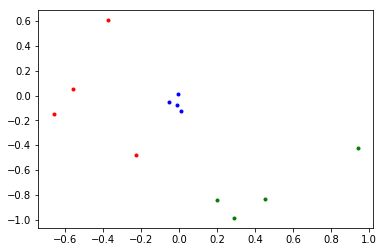

In [73]:
end1 = train_samples1
end2 = train_samples1+train_samples2
plt.plot(train[0][:end1,0], train[0][:end1,1], 'b.')
plt.plot(train[0][end1:end2,0], train[0][end1:end2,1], 'r.');
plt.plot(train[0][end2:,0], train[0][end2:,1], 'g.');

In [74]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=2))
net.AddLayer(Layer.PELayer(n=20))
net.AddLayer(Layer.PELayer(n=20))
net.AddLayer(Layer.TopPELayer(n=3))

From 2 to 20
From 20 to 20
From 20 to 3


In [67]:
net.learn = True
net.learn_weights = True
net.learn_biases = True
net.layers[0].beta = 1.
net.layers[-1].beta = 0.
net.learning_tau = 2.
epochs = 2
fp = FloatProgress(min=0,max=epochs)  
display(fp)
T = 3
start_time = time.time()
for k in range(epochs):
    np.random.shuffle(train_shuffle)
    for x in train_shuffle:
        net.SetInput(x[0])
        net.SetExpectation(x[1])
        net.Run(T, dt=0.01)
    fp.value += 1
end_time = time.time()
print('Total time: '+str(end_time-start_time))

A Jupyter Widget

Total time: 2.514615058898926


In [76]:
# Test the feedback (generative) performance
net.learn = False
net.learn_weights = False
net.learn_biases = False
beta = 1. # 1 for FF, 0 for FB
net.layers[0].beta = beta
net.layers[-1].beta = beta
inf_layer = -1 if beta==1 else 0
fp = FloatProgress(min=0,max=len(test[0]))  
display(fp)
x_true = []
x_est = []
for x in zip(test[0], test[1]):
    if beta==1:
        x_true.append(np.array(x[1]))
    else:
        x_true.append(np.array(x[0]))
    net.SetInput(x[0])
    net.SetExpectation(x[1])
    net.Run(10., dt=0.01)
    x_est.append(np.array(net.layers[inf_layer].v))
    fp.value += 1
x_true = np.array(x_true)
x_est = np.array(x_est)

A Jupyter Widget

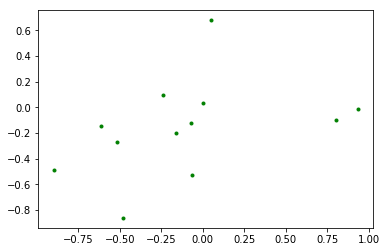

In [77]:
for x,t in zip(train[0], train[1]):
    y = net.Predict(2., x)
    yy = NN.OneHot(y)
    if yy[0]>0.5:
        plt.plot(x[0],x[1],'b.')
    elif yy[1]>0.5:
        plt.plot(x[0],x[1],'r.')
    else:
        plt.plot(x[0],x[1],'g.')